### Decision Tree algorithm 

belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.
The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).
In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.


### Types of Decision Trees
 
Types of decision trees are based on the type of target variable we have. It can be of two types:
1.	Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
2.	Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.
Example:- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (yes/ no). Here we know that the income of customers is a significant variable but the insurance company does not have income details for all customers. Now, as we know this is an important variable, then we can build a decision tree to predict customer income based on occupation, product, and various other variables. In this case, we are predicting values for the continuous variables.


### Assumptions while creating Decision Tree
 
Below are some of the assumptions we make while using Decision tree:
•	In the beginning, the whole training set is considered as the root.

•	Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.

•	Records are distributed recursively on the basis of attribute values.

•	Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
Decision Trees follow Sum of Product (SOP) representation. The Sum of product (SOP) is also known as Disjunctive Normal Form. For a class, every branch from the root of the tree to a leaf node having the same class is conjunction (product) of values, different branches ending in that class form a disjunction (sum).

The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node and each level. Handling this is to know as the attributes selection. We have different attributes selection measures to identify the attribute which can be considered as the root note at each level.


In [1]:
import pandas as pd
import numpy as np

In [12]:
data=pd.read_csv('weather_data.csv')
data.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Wind = le.fit_transform(data.Wind)
#data.Play = le.fit_transform(data.Play)
data.Humidity= le.fit_transform(data.Humidity)
data.Temperature = le.fit_transform(data.Temperature)
data.Outlook = le.fit_transform(data.Outlook)

In [14]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,0,1,1,Yes
4,1,0,1,0,No


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [15]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x.head()

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,0,1,1
4,1,0,1,0


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


### Entropy
 
Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. Flipping a coin is an example of an action that provides information that is random.


### Information Gain
 
Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy.

Information gain is a decrease in entropy. It computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values


### Gini Index
 
You can understand the Gini index as a cost function used to evaluate splits in the dataset. It is calculated by subtracting the sum of the squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.

Gini Index works with the categorical target variable “Success” or “Failure”. It performs only Binary splits.
Higher the value of Gini index higher the homogeneity.
Steps to Calculate Gini index for a split
1.	Calculate Gini for sub-nodes, using the above formula for success(p) and failure(q) (p²+q²).
2.	Calculate the Gini index for split using the weighted Gini score of each node of that split.
CART (Classification and Regression Tree) uses the Gini index method to create split points.



In [20]:
from sklearn.tree import DecisionTreeClassifier

# default criterion is gini--> gini impurity
# use entropy if you want to use information gain for the split

clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
y_pred = clf.predict(x_test)
print(y_pred)
print(y_test)

['No' 'No' 'Yes' 'Yes' 'Yes']
8     Yes
6     Yes
4      No
11     No
2     Yes
Name: Play, dtype: object


print('accuracy:', metrics.accuracy_score(y_test, y_pred)*100)

In [23]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is: ', cm, sep='\n')

confusion matrix is: 
[[0 2]
 [2 1]]


In [24]:
score=clf.score(x_test,y_test)
print('score:',score)

score: 0.2


In [25]:
from sklearn import tree
cols = list(x.columns.values)

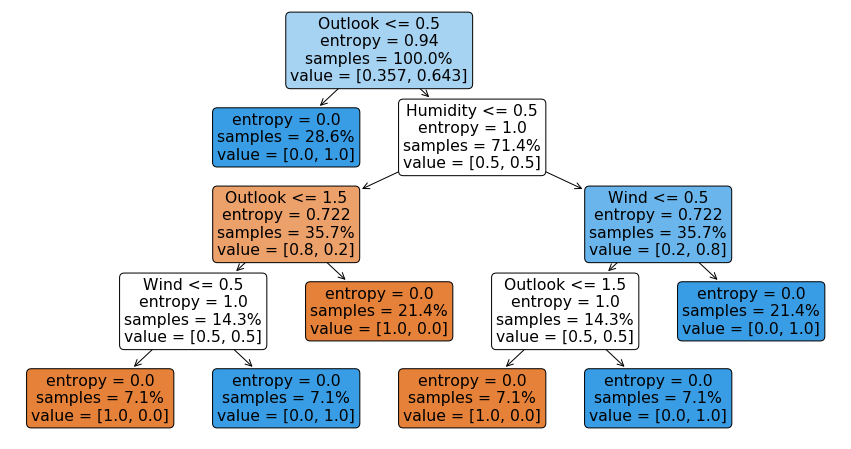

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x,y), feature_names=cols, filled= True, 
              precision=3, proportion=True, rounded= True)

plt.show()